In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd

In [2]:
engine = create_engine("sqlite:///../db/mlsseasons.sqlite", echo=False)

In [3]:
dataset=pd.DataFrame(engine.execute("""
select s."First Name", s."Last Name", s.Position,
c.Club, c.pts, c."#" as standing, c.season
from seasons c
join club_map m on m.long_name = c.Club
join salaries s on s."Club (grouped)" = m.short_name
where c.season = s.Season
"""),columns=['First Name','Last Name','Position','Club','PTS','Standing','Season'])
dataset

,First Name,Last Name,Position,Club,PTS,Standing,Season
0,None,Carreiro da Silva Fred,M-F,DCD.C. United,55,1,2007
1,Ben,Olsen,M,DCD.C. United,55,1,2007
2,Brad,North,F,DCD.C. United,55,1,2007
3,Brian,Carroll,M,DCD.C. United,55,1,2007
4,Bryan,Arguez,M-D,DCD.C. United,55,1,2007
...,...,...,...,...,...,...,...
6206,Quincy,Amarikwa,F,SJSan Jose Earthquakes,21,23,2018
6207,Shea,Salinas,M,SJSan Jose Earthquakes,21,23,2018
6208,Tommy,Thompson,M,SJSan Jose Earthquakes,21,23,2018
6209,"Valeri ""Vako""",Qazaishvili,M,SJSan Jose Earthquakes,21,23,2018


In [4]:
engine.execute("select sqlite_version()").first()

('3.22.0',)

In [5]:
dataset["First Name"] = dataset["First Name"].fillna("")

In [6]:
dataset['Player'] = dataset['First Name'] + dataset['Last Name'] # + dataset['Position']
dataset['Team'] = dataset['Club'] + dataset['Season'].apply(str)
dataset

,First Name,Last Name,Position,Club,PTS,Standing,Season,Player,Team
0,,Carreiro da Silva Fred,M-F,DCD.C. United,55,1,2007,Carreiro da Silva Fred,DCD.C. United2007
1,Ben,Olsen,M,DCD.C. United,55,1,2007,BenOlsen,DCD.C. United2007
2,Brad,North,F,DCD.C. United,55,1,2007,BradNorth,DCD.C. United2007
3,Brian,Carroll,M,DCD.C. United,55,1,2007,BrianCarroll,DCD.C. United2007
4,Bryan,Arguez,M-D,DCD.C. United,55,1,2007,BryanArguez,DCD.C. United2007
...,...,...,...,...,...,...,...,...,...
6206,Quincy,Amarikwa,F,SJSan Jose Earthquakes,21,23,2018,QuincyAmarikwa,SJSan Jose Earthquakes2018
6207,Shea,Salinas,M,SJSan Jose Earthquakes,21,23,2018,SheaSalinas,SJSan Jose Earthquakes2018
6208,Tommy,Thompson,M,SJSan Jose Earthquakes,21,23,2018,TommyThompson,SJSan Jose Earthquakes2018
6209,"Valeri ""Vako""",Qazaishvili,M,SJSan Jose Earthquakes,21,23,2018,"Valeri ""Vako""Qazaishvili",SJSan Jose Earthquakes2018


In [7]:
# Example on one player
subset = dataset.loc[dataset["Player"] == "BenOlsen"].sort_values("Season")
subset["Experience"] = range(subset.count()["Season"])
subset
#dataset.loc[dataset["Player"] == "BenOlsen"]

,First Name,Last Name,Position,Club,PTS,Standing,Season,Player,Team,Experience
1,Ben,Olsen,M,DCD.C. United,55,1,2007,BenOlsen,DCD.C. United2007,0
627,Ben,Olsen,M,DCD.C. United,38,10,2008,BenOlsen,DCD.C. United2008,1
1005,Ben,Olsen,M,DCD.C. United,40,10,2009,BenOlsen,DCD.C. United2009,2


In [8]:
# Add a column to the dataset "Experience" - how many years the player was in MLS prior to the season
for player in pd.unique(dataset["Player"]):
    subset = dataset.loc[dataset["Player"] == player].sort_values("Season")
    subset["Experience"] = range(subset.count()["Season"])
    for season in subset["Season"]:
        exp = subset.loc[subset["Season"] == season]["Experience"].array[0]
        dataset.loc[((dataset["Player"] == player) & (dataset["Season"] == season)), ["Experience"]] = exp + 1
dataset


,First Name,Last Name,Position,Club,PTS,Standing,Season,Player,Team,Experience
0,,Carreiro da Silva Fred,M-F,DCD.C. United,55,1,2007,Carreiro da Silva Fred,DCD.C. United2007,1.0
1,Ben,Olsen,M,DCD.C. United,55,1,2007,BenOlsen,DCD.C. United2007,1.0
2,Brad,North,F,DCD.C. United,55,1,2007,BradNorth,DCD.C. United2007,1.0
3,Brian,Carroll,M,DCD.C. United,55,1,2007,BrianCarroll,DCD.C. United2007,1.0
4,Bryan,Arguez,M-D,DCD.C. United,55,1,2007,BryanArguez,DCD.C. United2007,1.0
...,...,...,...,...,...,...,...,...,...,...
6206,Quincy,Amarikwa,F,SJSan Jose Earthquakes,21,23,2018,QuincyAmarikwa,SJSan Jose Earthquakes2018,10.0
6207,Shea,Salinas,M,SJSan Jose Earthquakes,21,23,2018,SheaSalinas,SJSan Jose Earthquakes2018,11.0
6208,Tommy,Thompson,M,SJSan Jose Earthquakes,21,23,2018,TommyThompson,SJSan Jose Earthquakes2018,5.0
6209,"Valeri ""Vako""",Qazaishvili,M,SJSan Jose Earthquakes,21,23,2018,"Valeri ""Vako""Qazaishvili",SJSan Jose Earthquakes2018,2.0


In [9]:
dataset.groupby("Player").count()["Season"].describe()

count    2250.000000
mean        2.758667
std         2.360747
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        12.000000
Name: Season, dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder
player_names = dataset["Player"].tolist()
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(player_names)
encoded_players = label_encoder.transform(player_names)
encoded_players

array([ 384,  231,  279, ..., 2122, 2165, 2222])

In [11]:
# Add the encoded player number to each player and a temp column 'present' for pivoting
dataset['encoded_player'] = encoded_players
dataset['present'] = 1.0

# As an example let's see how it looks like for one random player
dataset.loc[dataset['Player'] == 'BenOlsen']

,First Name,Last Name,Position,Club,PTS,Standing,Season,Player,Team,Experience,encoded_player,present
1,Ben,Olsen,M,DCD.C. United,55,1,2007,BenOlsen,DCD.C. United2007,1.0,231,1.0
627,Ben,Olsen,M,DCD.C. United,38,10,2008,BenOlsen,DCD.C. United2008,2.0,231,1.0
1005,Ben,Olsen,M,DCD.C. United,40,10,2009,BenOlsen,DCD.C. United2009,3.0,231,1.0


In [12]:
# Create a multi-hot vector for each team-season playes reflecting the players participation
samples = dataset.pivot(index="Team", columns="encoded_player", values='present').fillna(0)
samples

encoded_player,0,1,2,3,4,5,6,7,8,9,...,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250
Team,,,,,,,,,,,,,,,,,,,,,
ATLAtlanta United FC2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATLAtlanta United FC2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VANVancouver Whitecaps FC2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
samples.describe()

encoded_player,0,1,2,3,4,5,6,7,8,9,...,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.009174,0.045872,0.018349,0.004587,0.009174,0.004587,0.018349,0.013761,0.004587,0.022936,...,0.009174,0.004587,0.009174,0.027523,0.004587,0.004587,0.004587,0.009174,0.009174,0.018349
std,0.095562,0.209688,0.134517,0.067729,0.095562,0.067729,0.134517,0.116767,0.067729,0.150043,...,0.095562,0.067729,0.095562,0.163978,0.067729,0.067729,0.067729,0.095562,0.095562,0.134517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
experiences = dataset.pivot(index="Team", columns="encoded_player", values='Experience').fillna(0)
experiences.describe()

encoded_player,0,1,2,3,4,5,6,7,8,9,...,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,0.013761,0.252294,0.045872,0.004587,0.013761,0.004587,0.045872,0.027523,0.004587,0.068807,...,0.013761,0.004587,0.013761,0.096330,0.004587,0.004587,0.004587,0.013761,0.013761,0.0
std,0.151166,1.307765,0.368965,0.067729,0.151166,0.067729,0.368965,0.252498,0.067729,0.498698,...,0.151166,0.067729,0.151166,0.640338,0.067729,0.067729,0.067729,0.151166,0.151166,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.000000,10.000000,4.000000,1.000000,2.000000,1.000000,4.000000,3.000000,1.000000,5.000000,...,2.000000,1.000000,2.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.0


In [15]:
dataset['Standing'] = dataset['Standing'].astype(int)
dataset['PTS'] = dataset['PTS'].astype(int)

# Create a target vector to train the model on. Either on Standings or Points (PTS)
y = dataset.groupby('Team').mean()['Standing'].sort_index()
y

Team
ATLAtlanta United FC2017          4.0
ATLAtlanta United FC2018          2.0
CHIChicago Fire FC2007            8.0
CHIChicago Fire FC2008            3.0
CHIChicago Fire FC2009            6.0
                                 ... 
VANVancouver Whitecaps FC2014     9.0
VANVancouver Whitecaps FC2015     3.0
VANVancouver Whitecaps FC2016    16.0
VANVancouver Whitecaps FC2017     8.0
VANVancouver Whitecaps FC2018    14.0
Name: Standing, Length: 218, dtype: float64

In [16]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

In [17]:
# Create a sequence of input (training) data
X = samples.sort_index()
X

encoded_player,0,1,2,3,4,5,6,7,8,9,...,2241,2242,2243,2244,2245,2246,2247,2248,2249,2250
Team,,,,,,,,,,,,,,,,,,,,,
ATLAtlanta United FC2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATLAtlanta United FC2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VANVancouver Whitecaps FC2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Create a sequence of input (training) data of both participation AND experience
X = samples.join(experiences, rsuffix="e").fillna(0).sort_index()
X

encoded_player,0,1,2,3,4,5,6,7,8,9,...,2241e,2242e,2243e,2244e,2245e,2246e,2247e,2248e,2249e,2250e
Team,,,,,,,,,,,,,,,,,,,,,
ATLAtlanta United FC2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATLAtlanta United FC2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VANVancouver Whitecaps FC2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [20]:
X_train.shape

(163, 4502)

In [21]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=X_train.shape[-1]))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                90060     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 90,921
Trainable params: 90,921
Non-trainable params: 0
_________________________________________________________________


In [22]:
import tensorflow as tf
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [23]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    shuffle=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/30
6/6 [==============================] - 0s 44ms/step - loss: 129.2601 - accuracy: 0.0000e+00 - val_loss: 124.5387 - val_accuracy: 0.0000e+00
Epoch 2/30
6/6 [==============================] - 0s 7ms/step - loss: 125.3850 - accuracy: 0.0000e+00 - val_loss: 121.9173 - val_accuracy: 0.0000e+00
Epoch 3/30
6/6 [==============================] - 0s 7ms/step - loss: 121.8055 - accuracy: 0.0123 - val_loss: 118.5812 - val_accuracy: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 0s 6ms/step - loss: 116.9600 - accuracy: 0.0491 - val_loss: 113.6495 - val_accuracy: 0.0000e+00
Epoch 5/30
6/6 [==============================] - 0s 6ms/step - loss: 110.2637 - accuracy: 0.0675 - val_loss: 106.4619 - val_accuracy: 0.0182
Epoch 6/30
6/6 [==============================] - 0s 6ms/step - loss: 100.3835 - accuracy: 0.0675 - val_loss: 96.6041 - val_accuracy: 0.0182
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 88.0299 - accuracy: 0.0675 - val_loss: 83.4342 - val_a

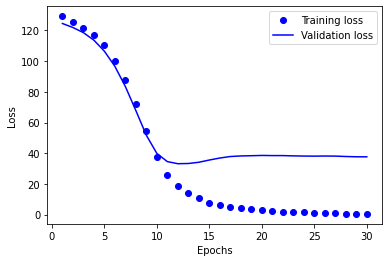

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, test_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: 37.6489 - accuracy: 0.0182
Normal Neural Network - Loss: 37.64891815185547, Accuracy: 0.0181818176060915


In [26]:
print("Model predicted:", model.predict(X_test.head(1)))
print("Actual value:", y_test.head(1))

Model predicted: [[15.897144]]
Actual value: Team
DCD.C. United2016    10.0
Name: Standing, dtype: float64


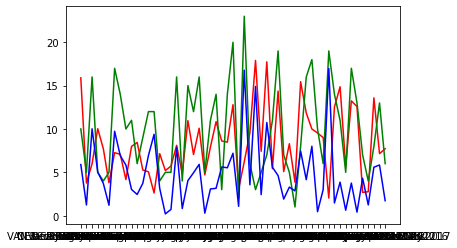

In [27]:
y_predicted = model.predict(X_test)
plt.plot(y_predicted, color="red")
plt.plot(y_test, color="green")
plt.plot(np.abs(np.subtract(y_predicted.reshape(y_predicted.shape[0]), y_test.to_numpy())), color="blue")

In [28]:
np.abs(np.subtract(y_predicted.reshape(y_predicted.shape[0]), y_test.to_numpy()))

array([ 5.89714432,  1.23607135, 10.01810694,  5.0350008 ,  3.71532536,
        1.20286417,  9.73649216,  6.92149258,  5.83461189,  3.01988697,
        2.44922638,  3.73028469,  6.93970299,  9.38271022,  3.14720821,
        0.20328617,  0.72450256,  7.88824081,  0.82293177,  4.04178524,
        4.95013952,  5.91975212,  0.29115391,  3.07899523,  3.15716171,
        5.6179142 ,  5.5243845 ,  7.20163155,  1.08113861, 16.77974701,
        3.56081676, 14.90507889,  2.42934418, 10.74538612,  5.58618736,
        4.62881947,  1.91526222,  3.29527855,  2.85815454,  7.45346451,
        4.15037251,  8.0079565 ,  0.46110058,  3.00205898, 16.97080779,
        1.46655178,  3.86652851,  0.62937069,  3.75830364,  0.40963078,
        4.31687832,  1.23886251,  5.58861637,  5.84419298,  1.72134781])

In [29]:
print(y_predicted.reshape(y_predicted.shape[0]).shape, y_test.to_numpy().shape)

(55,) (55,)


In [30]:
# Approach #2: encoded standings
encoded_standings = dataset[['Team', 'Standing']].groupby('Team').max()
encoded_standings['taken'] = 1.0
encoded_standings

,Standing,taken
Team,,
ATLAtlanta United FC2017,4,1.0
ATLAtlanta United FC2018,2,1.0
CHIChicago Fire FC2007,8,1.0
CHIChicago Fire FC2008,3,1.0
CHIChicago Fire FC2009,6,1.0
...,...,...
VANVancouver Whitecaps FC2014,9,1.0
VANVancouver Whitecaps FC2015,3,1.0
VANVancouver Whitecaps FC2016,16,1.0


In [31]:
categorical_standings = encoded_standings.pivot(columns="Standing", values='taken').fillna(0).sort_index()
categorical_standings

Standing,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
Team,,,,,,,,,,,,,,,,,,,,,
ATLAtlanta United FC2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATLAtlanta United FC2018,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2008,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHIChicago Fire FC2009,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VANVancouver Whitecaps FC2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2015,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VANVancouver Whitecaps FC2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, categorical_standings, random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(163, 4502) (55, 4502) (163, 23) (55, 23)


In [33]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=X_train.shape[-1]))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=encoded_standings['Standing'].max(), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                45030     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 23)                253       
Total params: 45,503
Trainable params: 45,503
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    shuffle=True,
    verbose=1,
    validation_data=(X_test, y_test)
)

Epoch 1/30
6/6 [==============================] - 0s 42ms/step - loss: 3.1440 - accuracy: 0.0613 - val_loss: 3.1456 - val_accuracy: 0.0364
Epoch 2/30
6/6 [==============================] - 0s 8ms/step - loss: 3.0544 - accuracy: 0.0982 - val_loss: 3.1540 - val_accuracy: 0.0182
Epoch 3/30
6/6 [==============================] - 0s 6ms/step - loss: 2.9884 - accuracy: 0.1166 - val_loss: 3.1686 - val_accuracy: 0.0000e+00
Epoch 4/30
6/6 [==============================] - 0s 6ms/step - loss: 2.9297 - accuracy: 0.1227 - val_loss: 3.1884 - val_accuracy: 0.0000e+00
Epoch 5/30
6/6 [==============================] - 0s 6ms/step - loss: 2.8653 - accuracy: 0.1350 - val_loss: 3.2128 - val_accuracy: 0.0000e+00
Epoch 6/30
6/6 [==============================] - 0s 11ms/step - loss: 2.8032 - accuracy: 0.1411 - val_loss: 3.2435 - val_accuracy: 0.0000e+00
Epoch 7/30
6/6 [==============================] - 0s 7ms/step - loss: 2.7426 - accuracy: 0.1472 - val_loss: 3.2706 - val_accuracy: 0.0000e+00
Epoch 8/30
6

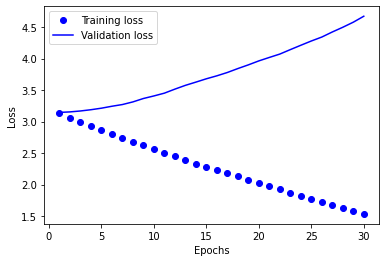

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, test_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()